# Statistiques descriptives 

# Modules utiles

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns
import sklearn.preprocessing 
from sklearn.preprocessing import scale 


c:\Users\elelo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Données ENEDIS

"Ce jeu de données restitue la consommation d’électricité au pas 1/2h des points de soutirage <= 36kVA raccordés au réseau Enedis. Il donne les volumes d'énergie soutirés, les courbes de charge moyennes de clients dotés de compteurs communicants et le nombre de clients. Ces agrégats sont disponibles par plage de puissance souscrite, profil et région."

Dictionnaire des variables : https://data.enedis.fr/api/datasets/1.0/conso-inf36-region/attachments/note_externe_jdd_article_23_pdf/

In [39]:
#chemin elena
enedis = pd.read_csv("C:/Users/elelo/Documents/ENSAE/données statapp/Données/conso-inf36-region.csv",sep=";")

#chemin jérémie
#enedis = pd.read_csv("/Users/jeremiedarracq/Stat-app/enedis.csv",sep=";")

#chemin côme
#enedis = pd.read_csv("/Users/",sep=";")


In [2]:
enedis_2020=pd.read_csv("Données/enedis_2020.csv")
enedis_2021=pd.read_csv("Données/enedis_2021.csv")

enedis=pd.concat([enedis_2020,enedis_2021])
enedis.drop_duplicates(inplace=True)
enedis.sort_values("horodate",inplace=True)

On enlève les profils pro :


In [3]:
enedis["profil_type"]=enedis["profil"].apply(lambda x : x[0:3])
enedis

,horodate,region,code_region,total_energie_soutiree_wh,plage_de_puissance_souscrite,nb_points_soutirage,jour_max_du_mois_0_1,semaine_max_du_mois_0_1,profil,profil_type
0,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,2799437.0,P5: ]12-15] kVA,10621,0,0,PRO1 (+ PRO1WE),PRO
598,2020-06-04T00:00:00+00:00,Provence-Alpes-Côte d'Azur,93,1728585.0,P6: ]15-18] kVA,2184,0,0,PRO3,PRO
599,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,8589737.0,P3: ]6-9] kVA,60839,0,0,PRO1 (+ PRO1WE),PRO
600,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,16135438.0,P6: ]15-18] kVA,51910,0,0,PRO1 (+ PRO1WE),PRO
601,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,16634527.0,P9: ]30-36] kVA,12497,0,0,PRO2 (+ PRO2WE + PRO6),PRO
...,...,...,...,...,...,...,...,...,...,...
9719463,2021-08-15T00:00:00+00:00,Hauts-de-France,32,43857840.0,P0: Total <= 36 kVA,72969,0,0,PRO2 (+ PRO2WE + PRO6),PRO
9719464,2021-08-15T00:00:00+00:00,Pays de la Loire,52,9344100.0,P6: ]15-18] kVA,20440,0,0,RES2 (+ RES5),RES
9719465,2021-08-15T00:00:00+00:00,Grand-Est,44,586136.0,P6: ]15-18] kVA,906,0,0,PRO3,PRO
9719454,2021-08-15T00:00:00+00:00,Grand-Est,44,7963365.0,P1: ]0-3] kVA,19448,0,0,PRO5,PRO


In [5]:
enedis.drop(enedis[enedis["profil_type"]!="RES"].index,inplace=True)

On récupère la date :

In [6]:
## On extrait la date pour classifier par jour 
enedis["date"]=enedis["horodate"].apply(lambda x : x[0:10])
enedis

,horodate,region,code_region,total_energie_soutiree_wh,plage_de_puissance_souscrite,nb_points_soutirage,jour_max_du_mois_0_1,semaine_max_du_mois_0_1,profil,profil_type,date
602,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,130666817.0,P2: ]3-6] kVA,1685439,0,0,RES1 (+ RES1WE),RES,2020-06-04
603,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,436083.0,P8: ]24-30] kVA,901,0,0,RES11 (+ RES11WE),RES,2020-06-04
604,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,2133213.0,P9: ]30-36] kVA,3839,0,0,RES11 (+ RES11WE),RES,2020-06-04
605,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,104448854.0,P4: ]9-12] kVA,269648,0,0,RES2 (+ RES5),RES,2020-06-04
606,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,804838.0,P4: ]9-12] kVA,1830,0,0,RES2WE,RES,2020-06-04
...,...,...,...,...,...,...,...,...,...,...,...
9719458,2021-08-15T00:00:00+00:00,Grand-Est,44,2278143.0,P0: Total <= 36 kVA,13717,0,0,RES2WE,RES,2021-08-15
9719459,2021-08-15T00:00:00+00:00,Grand-Est,44,4639000.0,P0: Total <= 36 kVA,14822,0,0,RES3,RES,2021-08-15
9719460,2021-08-15T00:00:00+00:00,Grand-Est,44,1200637.0,P6: ]15-18] kVA,3395,0,0,RES3,RES,2021-08-15
9719464,2021-08-15T00:00:00+00:00,Pays de la Loire,52,9344100.0,P6: ]15-18] kVA,20440,0,0,RES2 (+ RES5),RES,2021-08-15


On ajoute la consommation moyenne par 1/2h prar profil et par plage de puissance : $\frac{total\_energie\_soutiree}{nb\_points\_soutirage}$ :

In [113]:
enedis["energie_soutiree_moyenne"]=enedis["total_energie_soutiree_wh"]/enedis["nb_points_soutirage"]

In [114]:
enedis

,horodate,region,code_region,total_energie_soutiree_wh,plage_de_puissance_souscrite,nb_points_soutirage,jour_max_du_mois_0_1,semaine_max_du_mois_0_1,profil,profil_type,date,energie_soutiree_moyenne
602,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,130666817.0,P2: ]3-6] kVA,1685439,0,0,RES1 (+ RES1WE),RES,2020-06-04,77.526874
603,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,436083.0,P8: ]24-30] kVA,901,0,0,RES11 (+ RES11WE),RES,2020-06-04,483.998890
604,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,2133213.0,P9: ]30-36] kVA,3839,0,0,RES11 (+ RES11WE),RES,2020-06-04,555.668924
605,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,104448854.0,P4: ]9-12] kVA,269648,0,0,RES2 (+ RES5),RES,2020-06-04,387.352600
606,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,804838.0,P4: ]9-12] kVA,1830,0,0,RES2WE,RES,2020-06-04,439.802186
...,...,...,...,...,...,...,...,...,...,...,...,...
9719458,2021-08-15T00:00:00+00:00,Grand-Est,44,2278143.0,P0: Total <= 36 kVA,13717,0,0,RES2WE,RES,2021-08-15,166.081723
9719459,2021-08-15T00:00:00+00:00,Grand-Est,44,4639000.0,P0: Total <= 36 kVA,14822,0,0,RES3,RES,2021-08-15,312.980704
9719460,2021-08-15T00:00:00+00:00,Grand-Est,44,1200637.0,P6: ]15-18] kVA,3395,0,0,RES3,RES,2021-08-15,353.648601
9719464,2021-08-15T00:00:00+00:00,Pays de la Loire,52,9344100.0,P6: ]15-18] kVA,20440,0,0,RES2 (+ RES5),RES,2021-08-15,457.147750


On ajoute le nombre de points de soutirage total :

In [115]:
enedis_nb_sous_tirage=enedis.groupby(["horodate","region"])["nb_points_soutirage"].sum().reset_index()

In [116]:
enedis_nb_sous_tirage

,horodate,region,nb_points_soutirage
0,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,8142338
1,2020-06-04T00:00:00+00:00,Bourgogne-Franche-Comté,2931555
2,2020-06-04T00:00:00+00:00,Bretagne,3726934
3,2020-06-04T00:00:00+00:00,Centre-Val de Loire,2482491
4,2020-06-04T00:00:00+00:00,Grand-Est,3937292
...,...,...,...
251719,2021-08-15T00:00:00+00:00,Nouvelle Aquitaine,6293248
251720,2021-08-15T00:00:00+00:00,Occitanie,6838478
251721,2021-08-15T00:00:00+00:00,Pays de la Loire,4010298
251722,2021-08-15T00:00:00+00:00,Provence-Alpes-Côte d'Azur,6060771


In [53]:
## On extrait la date pour classifier par jour 
enedis_nb_sous_tirage["date"]=enedis_nb_sous_tirage["horodate"].apply(lambda x : x[0:10])
enedis_nb_sous_tirage=enedis_nb_sous_tirage.groupby(["region","date"])["nb_points_soutirage"].sum().reset_index()

In [54]:
enedis_nb_sous_tirage

,region,date,nb_points_soutirage
0,Auvergne-Rhône-Alpes,2020-06-04,203616109
1,Auvergne-Rhône-Alpes,2020-06-05,183620565
2,Auvergne-Rhône-Alpes,2020-06-06,195965662
3,Auvergne-Rhône-Alpes,2020-06-07,194223348
4,Auvergne-Rhône-Alpes,2020-06-08,199155995
...,...,...,...
5251,Île-de-France,2021-08-11,547718472
5252,Île-de-France,2021-08-12,547705928
5253,Île-de-France,2021-08-13,547736176
5254,Île-de-France,2021-08-14,547700548


In [117]:
enedis.to_csv("Données/enedis_res.csv",index=False)

## Données méteo


**Données des températures régionales du 1er janvier 2018 au 31 octobre 2022 :**

In [118]:
meteo_reg_df=pd.read_csv("Données/temperature-quotidienne-regionale.csv",";")
meteo_reg_df


c:\Users\elelo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,date,code_insee_region,region,tmin,tmax,tmoy
0,2018-01-01T00:00:00-11,2018-01-01,11,Île-de-France,5.96,9.28,7.62
1,2018-01-01T00:00:00-28,2018-01-01,28,Normandie,5.00,8.98,6.99
2,2018-01-01T00:00:00-24,2018-01-01,24,Centre-Val de Loire,5.25,9.68,7.47
3,2018-01-02T00:00:00-11,2018-01-02,11,Île-de-France,5.32,13.60,9.46
4,2018-01-02T00:00:00-84,2018-01-02,84,Auvergne-Rhône-Alpes,3.02,11.56,7.29
...,...,...,...,...,...,...,...
32404,2022-10-30T00:00:00-93,2022-10-30,93,Provence-Alpes-Côte d'Azur,11.82,23.62,17.72
32405,2022-10-30T00:00:00-32,2022-10-30,32,Hauts-de-France,11.66,16.96,14.31
32406,2022-10-30T00:00:00-76,2022-10-30,76,Occitanie,12.33,23.24,17.78
32407,2022-10-31T00:00:00-24,2022-10-31,24,Centre-Val de Loire,11.05,21.63,16.34


In [119]:
meteo_reg_df.groupby(["region"])["tmoy"]

Boite à moustache des températures. Consommation moyenne quotidienne par région, chaque jour combien un foyer consomme

## Données socio économique

In [120]:
socio=pd.read_csv("Données/data_socio.csv",sep=";",header=2)
socio

,Code,Libellé,"Part des ""artisans, commerçants, chefs d'entreprise"" dans la population 2018","Part des ""employés"" dans la population 2018","Part des ""ouvriers"" dans la population 2018","Part des ""retraités"" dans la population 2018","Part des ""agriculteurs exploitants"" dans la population 2018","Part des ""professions intermédiaires"" dans la population 2018","Part des ""autres sans activité professionnelle"" dans la population 2018","Part des ""autres sans activité professionnelle"" dans la population 2018.1","Part des ""cadres et professions intellectuelles supérieures"" dans la population 2018",Médiane du revenu disponible par UC 2018,Population au dernier recensement 2018,Part des 15-29 ans 2018,Part des 30-44 ans 2018,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018
0,1,Guadeloupe,4.9,18.7,10.4,23.0,0.8,12.0,25.3,26.5,4.8,NaN,387629.0,16.4,16.3,23.3,17.3,8.3,28.3
1,2,Martinique,3.9,19.0,11.1,25.2,0.7,12.4,22.4,22.8,5.2,17880.0,368783.0,15.7,15.5,24.6,18.2,9.6,23.0
2,3,Guyane,3.3,15.2,10.7,7.0,0.8,10.9,46.8,51.1,5.2,NaN,276128.0,23.4,20.5,14.5,6.8,1.9,34.2
3,4,La Réunion,3.5,20.3,13.1,14.9,0.9,12.2,30.1,35.2,4.9,15440.0,855961.0,19.7,19.2,21.2,12.3,4.7,32.8
4,6,Mayotte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11,Île-de-France,3.2,16.4,8.5,19.4,0.1,15.9,18.3,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1
6,24,Centre-Val de Loire,3.2,16.0,13.9,31.0,1.0,13.8,14.1,16.2,7.1,21560.0,2572853.0,15.9,17.5,20.1,18.1,10.7,12.5
7,27,Bourgogne-Franche-Comté,3.3,15.2,14.8,31.4,1.2,13.1,14.6,17.1,6.3,21480.0,2807807.0,16.2,17.3,20.1,18.6,10.9,12.0
8,28,Normandie,3.2,16.0,14.4,30.1,1.0,13.4,15.5,17.6,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2
9,32,Hauts-de-France,2.6,16.4,14.7,25.5,0.5,13.5,19.8,23.4,7.0,20110.0,6004108.0,18.5,18.8,19.5,15.9,7.9,16.3


In [121]:
socio["Code"]=socio["Code"].astype("str")
socio.drop( socio[ (socio['Code'] == "1") | (socio['Code'] == "2") | (socio['Code'] == "3") | (socio['Code'] == "4") | (socio['Code'] == "6")].index, inplace=True)
socio

,Code,Libellé,"Part des ""artisans, commerçants, chefs d'entreprise"" dans la population 2018","Part des ""employés"" dans la population 2018","Part des ""ouvriers"" dans la population 2018","Part des ""retraités"" dans la population 2018","Part des ""agriculteurs exploitants"" dans la population 2018","Part des ""professions intermédiaires"" dans la population 2018","Part des ""autres sans activité professionnelle"" dans la population 2018","Part des ""autres sans activité professionnelle"" dans la population 2018.1","Part des ""cadres et professions intellectuelles supérieures"" dans la population 2018",Médiane du revenu disponible par UC 2018,Population au dernier recensement 2018,Part des 15-29 ans 2018,Part des 30-44 ans 2018,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018
5,11,Île-de-France,3.2,16.4,8.5,19.4,0.1,15.9,18.3,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1
6,24,Centre-Val de Loire,3.2,16.0,13.9,31.0,1.0,13.8,14.1,16.2,7.1,21560.0,2572853.0,15.9,17.5,20.1,18.1,10.7,12.5
7,27,Bourgogne-Franche-Comté,3.3,15.2,14.8,31.4,1.2,13.1,14.6,17.1,6.3,21480.0,2807807.0,16.2,17.3,20.1,18.6,10.9,12.0
8,28,Normandie,3.2,16.0,14.4,30.1,1.0,13.4,15.5,17.6,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2
9,32,Hauts-de-France,2.6,16.4,14.7,25.5,0.5,13.5,19.8,23.4,7.0,20110.0,6004108.0,18.5,18.8,19.5,15.9,7.9,16.3
10,44,Grand Est,2.9,16.4,14.7,27.3,0.8,13.8,17.0,20.4,7.2,21610.0,5550389.0,17.5,18.3,20.6,17.1,9.3,13.3
11,52,Pays de la Loire,3.3,15.3,14.8,29.4,1.2,14.2,13.9,15.6,7.8,21620.0,3781423.0,17.0,18.4,19.5,16.8,9.7,11.2
12,53,Bretagne,3.5,15.1,13.0,31.2,1.3,13.7,14.7,16.2,7.6,21750.0,3335414.0,16.4,17.6,20.1,18.1,10.5,11.4
13,75,Nouvelle-Aquitaine,4.0,15.9,12.1,31.9,1.3,13.1,14.7,16.7,7.1,21290.0,5979778.0,15.9,17.4,20.3,19.0,11.4,12.6
14,76,Occitanie,4.3,15.7,10.2,29.3,1.2,13.6,17.3,20.1,8.4,20740.0,5885496.0,16.8,17.7,20.0,18.1,10.7,14.5


## Base de données merged

In [122]:
enedis["code_region"]=enedis["code_region"].astype("str")

In [123]:
enedis_socio=pd.merge(enedis,socio,how='left',left_on="code_region",right_on="Code")

Finalement, il faut merger les données météo et enedis sur date et région

In [124]:
meteo_reg_df["code_insee_region"]=meteo_reg_df["code_insee_region"].astype("str")

In [125]:
enedis_final=pd.merge(enedis_socio,meteo_reg_df,how='left',left_on=["date","code_region"],right_on=["date","code_insee_region"])

In [126]:
enedis_final.to_csv("Données/enedis_final.csv",index=False)

## Statistiques descriptives sur bdd enedis

In [127]:
# Affiche les données où il y a des valeurs manquantes pour tmoy

bool_series = pd.isnull(enedis_final["tmoy"])
nul=enedis_final[bool_series]
nul
# il manque 10 903 lignes de températures, pour la journée du 2021-04-30


,horodate,region_x,code_region,total_energie_soutiree_wh,plage_de_puissance_souscrite,nb_points_soutirage,jour_max_du_mois_0_1,semaine_max_du_mois_0_1,profil,profil_type,...,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018,id,code_insee_region,region_y,tmin,tmax,tmoy
3580244,2021-04-30T00:00:00+00:00,Centre-Val de Loire,24,3063988.0,P7: ]18-24] kVA,2684,0,0,RES2 (+ RES5),RES,...,20.1,18.1,10.7,12.5,NaN,NaN,NaN,NaN,NaN,NaN
3580245,2021-04-30T00:00:00+00:00,Centre-Val de Loire,24,1120413.0,P1: ]0-6] kVA,4372,0,0,RES2WE,RES,...,20.1,18.1,10.7,12.5,NaN,NaN,NaN,NaN,NaN,NaN
3580246,2021-04-30T00:00:00+00:00,Centre-Val de Loire,24,241351.0,P6: ]15-36] kVA,281,0,0,RES2WE,RES,...,20.1,18.1,10.7,12.5,NaN,NaN,NaN,NaN,NaN,NaN
3580247,2021-04-30T00:00:00+00:00,Centre-Val de Loire,24,289084024.0,P0: Total <= 36 kVA,608321,0,0,RES2 (+ RES5),RES,...,20.1,18.1,10.7,12.5,NaN,NaN,NaN,NaN,NaN,NaN
3580248,2021-04-30T00:00:00+00:00,Centre-Val de Loire,24,14871795.0,P5: ]12-15] kVA,22849,0,0,RES2 (+ RES5),RES,...,20.1,18.1,10.7,12.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591142,2021-04-30T23:30:00+00:00,Occitanie,76,11426783.0,P0: Total <= 36 kVA,41259,0,0,RES4,RES,...,20.0,18.1,10.7,14.5,NaN,NaN,NaN,NaN,NaN,NaN
3591143,2021-04-30T23:30:00+00:00,Centre-Val de Loire,24,690274.0,P4: ]9-12] kVA,1422,0,0,RES3,RES,...,20.1,18.1,10.7,12.5,NaN,NaN,NaN,NaN,NaN,NaN
3591144,2021-04-30T23:30:00+00:00,Normandie,28,1237872.0,P9: ]30-36] kVA,1071,0,0,RES11 (+ RES11WE),RES,...,19.9,17.8,9.9,13.2,NaN,NaN,NaN,NaN,NaN,NaN
3591145,2021-04-30T23:30:00+00:00,Normandie,28,128613.0,P1: ]0-9] kVA,478,0,0,RES4,RES,...,19.9,17.8,9.9,13.2,NaN,NaN,NaN,NaN,NaN,NaN


#### Statistiques sur les températures

* Variation de la température par jour par région 
  

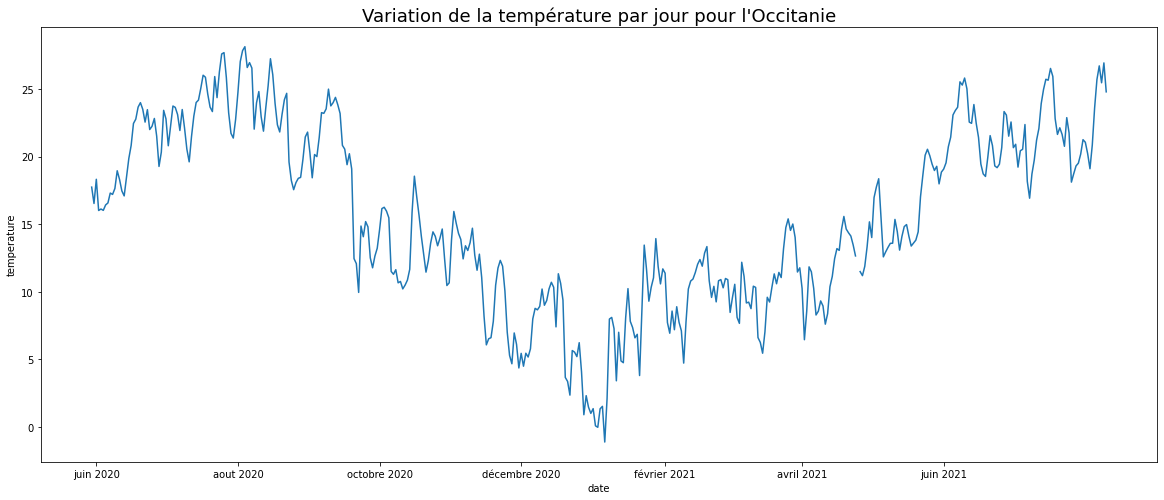

In [128]:
res=enedis_final[enedis_final["region_x"]=='Occitanie'].groupby("date")["tmoy"].mean()
plt.figure(figsize=(20, 8))
plt.plot(res)
t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
plt.xlabel('date')
plt.ylabel('temperature')
plt.title("Variation de la température par jour pour l'"+'Occitanie',size=18)
plt.show()

In [129]:
def temp_day_region(df,region):
    res=enedis_final[enedis_final["region_x"]==region].groupby("date")["tmoy"].mean()
    plt.plot(res, label= region)
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.title("Variation de la température par jour pour "+region,size=18)
    
    

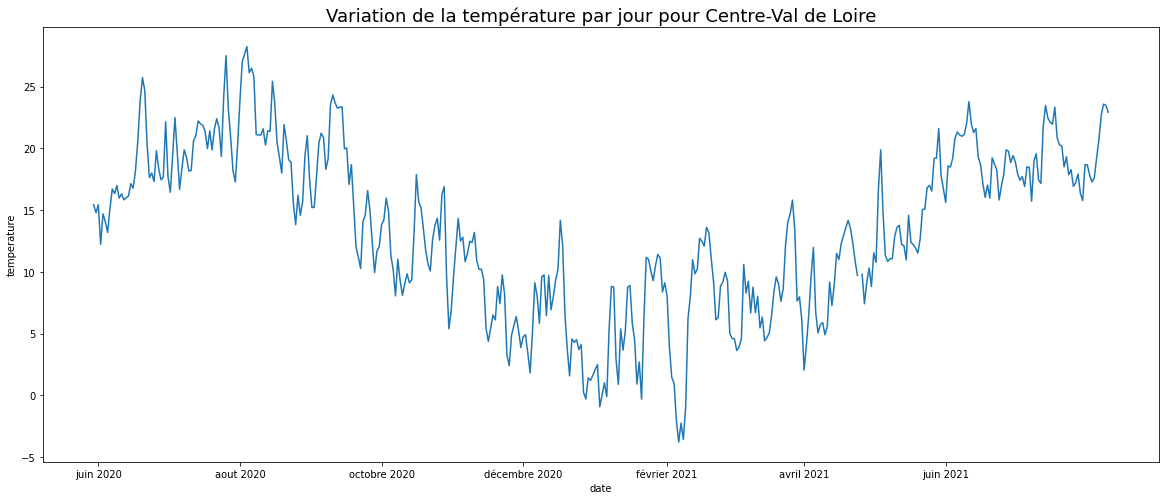

In [130]:
plt.figure(figsize=(20, 8))
temp_day_region(enedis_final,'Centre-Val de Loire')

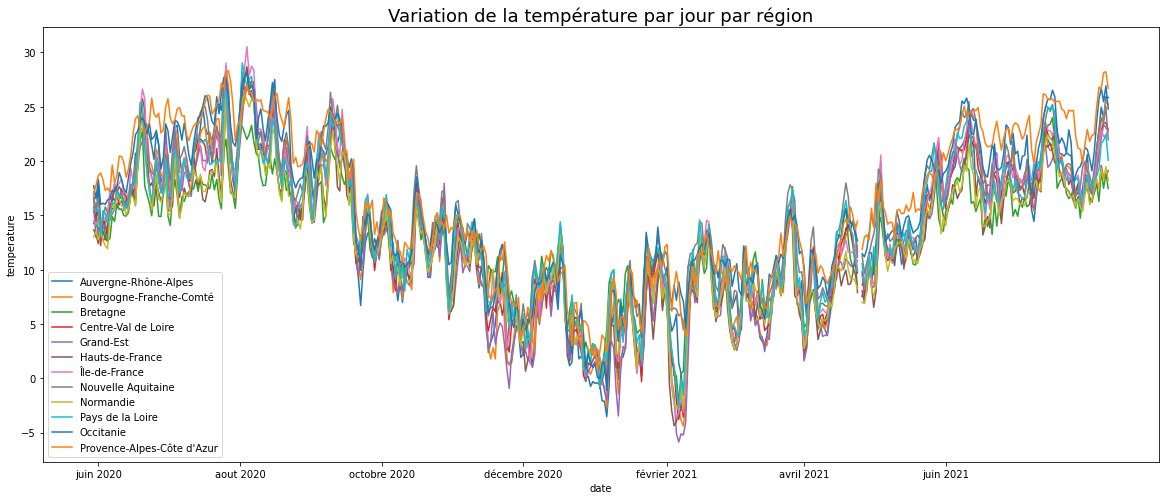

In [90]:
regions=list(enedis_final["region_x"].unique())

def temp_day_regions(df,regions):
    plt.figure(figsize=(20, 8))
    for region in regions:
        temp_day_region(enedis_final,region)
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.legend()
    plt.title("Variation de la température par jour par région",size=18)
    plt.show()

temp_day_regions(enedis_final,regions)

* Corrélation entre Température moyenne et énergie moyenne soutirée par jour (A verifier)

On va créer deux df : un avec les profils hautes conso >6kva et les autres <6kva

In [146]:
haute_conso=enedis_final[enedis_final["profil"]=="RES11 (+ RES11WE)"]
basse_conso=enedis_final[enedis_final["profil"]=="RES1 (+ RES1WE)"]

In [151]:
haute_conso["energie_soutiree_moyenne"]

1          483.998890
2          555.668924
11         118.376019
12         233.521764
14         388.366057
              ...    
4876503    120.287158
4876505    149.753782
4876506    479.456808
4876510    487.991546
4876516    204.527666
Name: energie_soutiree_moyenne, Length: 1037800, dtype: float64

In [152]:
def corr_total_energie_temperature(df,region):
    plt.figure(figsize=(20, 8))
    plt.ylabel("total d'energie soutirée par jour")
    plt.xlabel('temperature')
    plt.legend()
    plt.title("Corrélation entre température moyenne et énergie moyenne soutirée par jour pour "+region,size=18)
    X1=df[df["region_x"]==region].groupby("date")["tmoy"].mean()
    X2=df[df["region_x"]==region].groupby("date")["energie_soutiree_moyenne"].mean()
    plt.plot(X1,X2,"ob")
    plt.show()
    correlation=X1.corr(X2)
    print("La corrélation est de " +str(correlation))
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


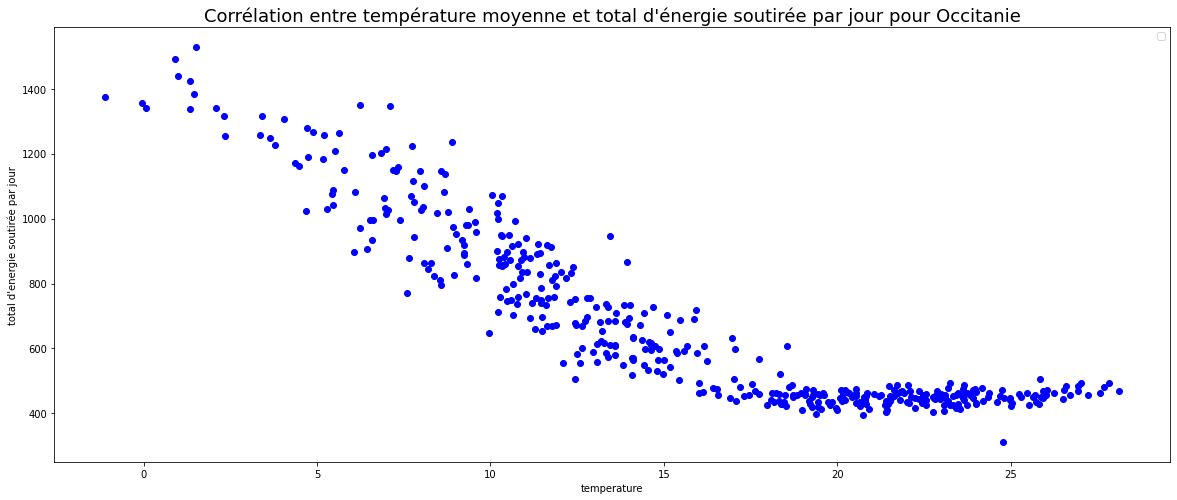

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


La corrélation est de -0.9009103559913102


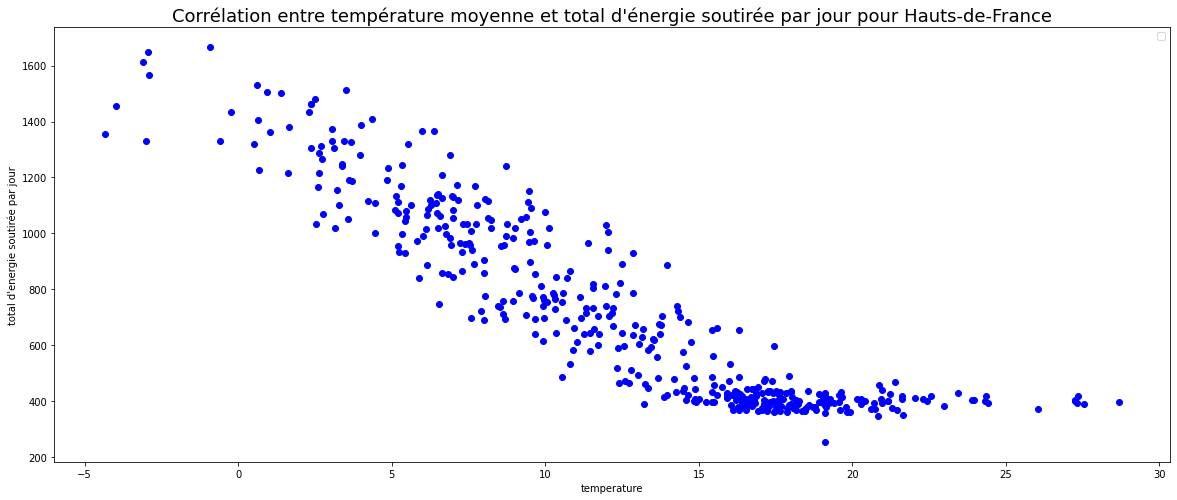

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


La corrélation est de -0.9095306707974153


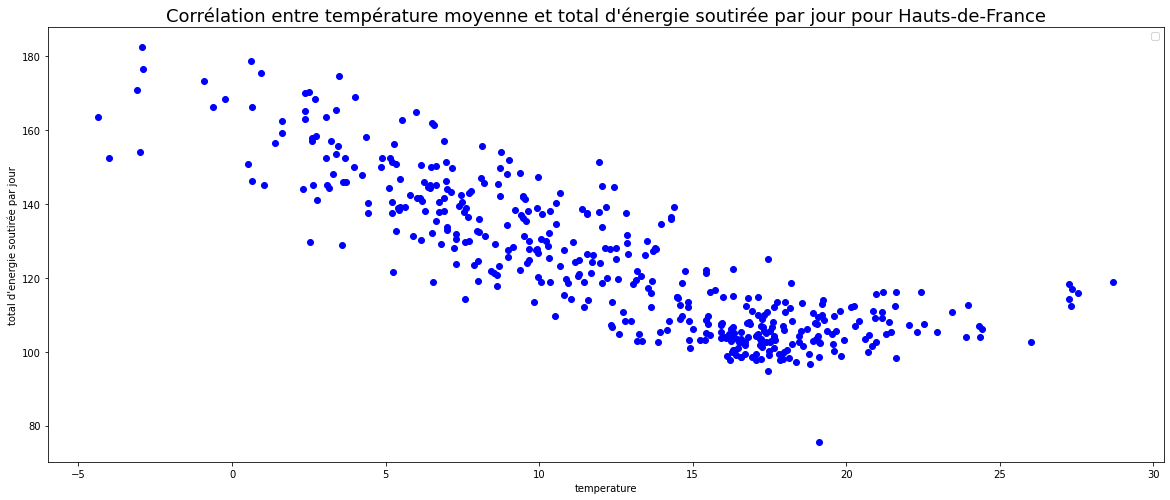

La corrélation est de -0.8445048032969377


In [154]:
corr_total_energie_temperature(haute_conso,"Occitanie")
corr_total_energie_temperature(haute_conso,"Hauts-de-France")

corr_total_energie_temperature(basse_conso,"Hauts-de-France")


In [166]:
def conso_day_reg(df,region):
    res=df[df["region_x"]==region].groupby("date")["energie_soutiree_moyenne"].mean()
    plt.figure(figsize=(20, 8))
    plt.plot(res)
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
    plt.xlabel('date')
    plt.ylabel('consommation moyenne en Wh par jour')
    plt.title("Variation de la consommation électrique sur 1 an pour l'"+region,size=18)
    plt.show
    

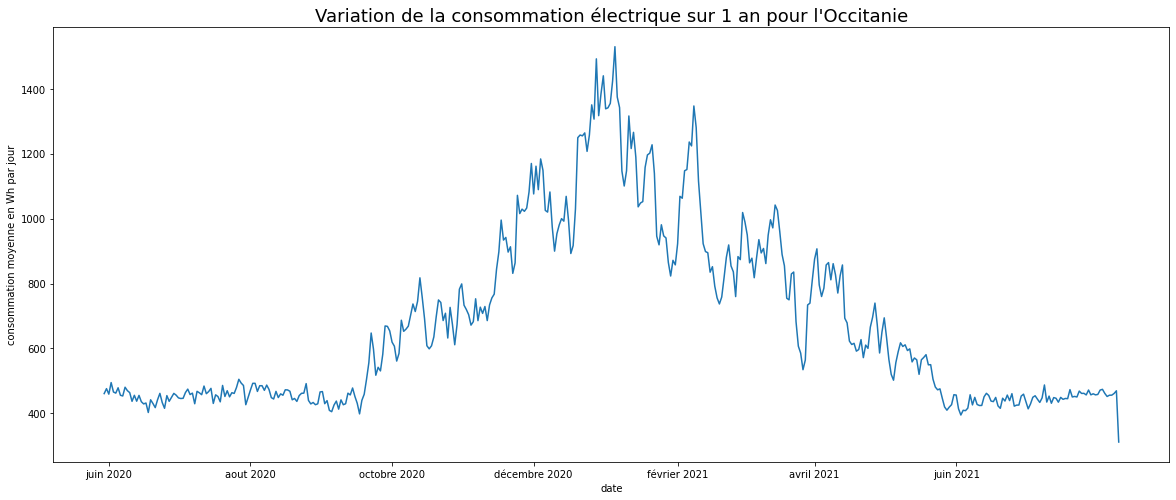

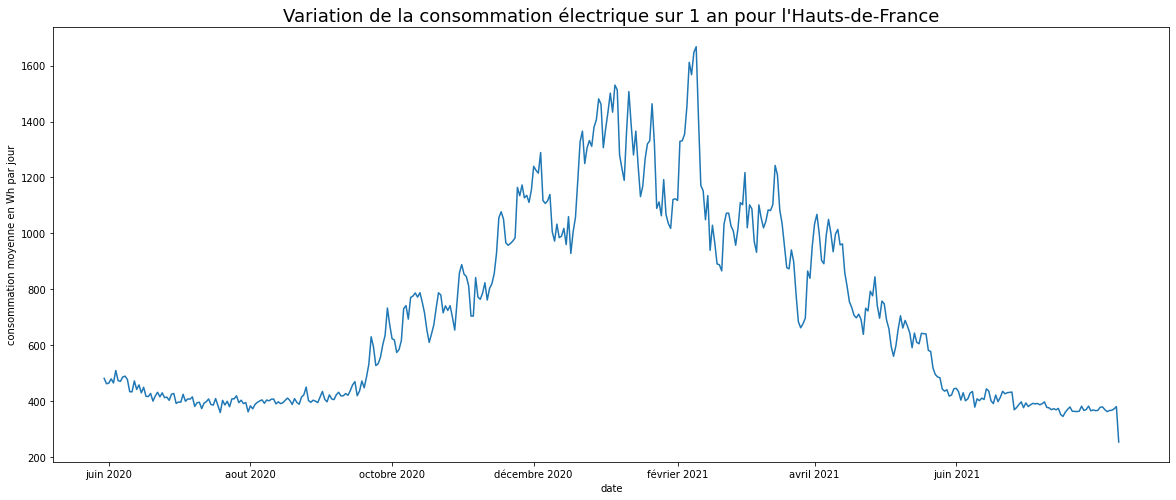

In [167]:
conso_day_reg(haute_conso,'Occitanie')

conso_day_reg(haute_conso,'Hauts-de-France')

<AxesSubplot:title={'center':'energie_soutiree_moyenne'}, xlabel='region_x'>

<Figure size 2160x720 with 0 Axes>

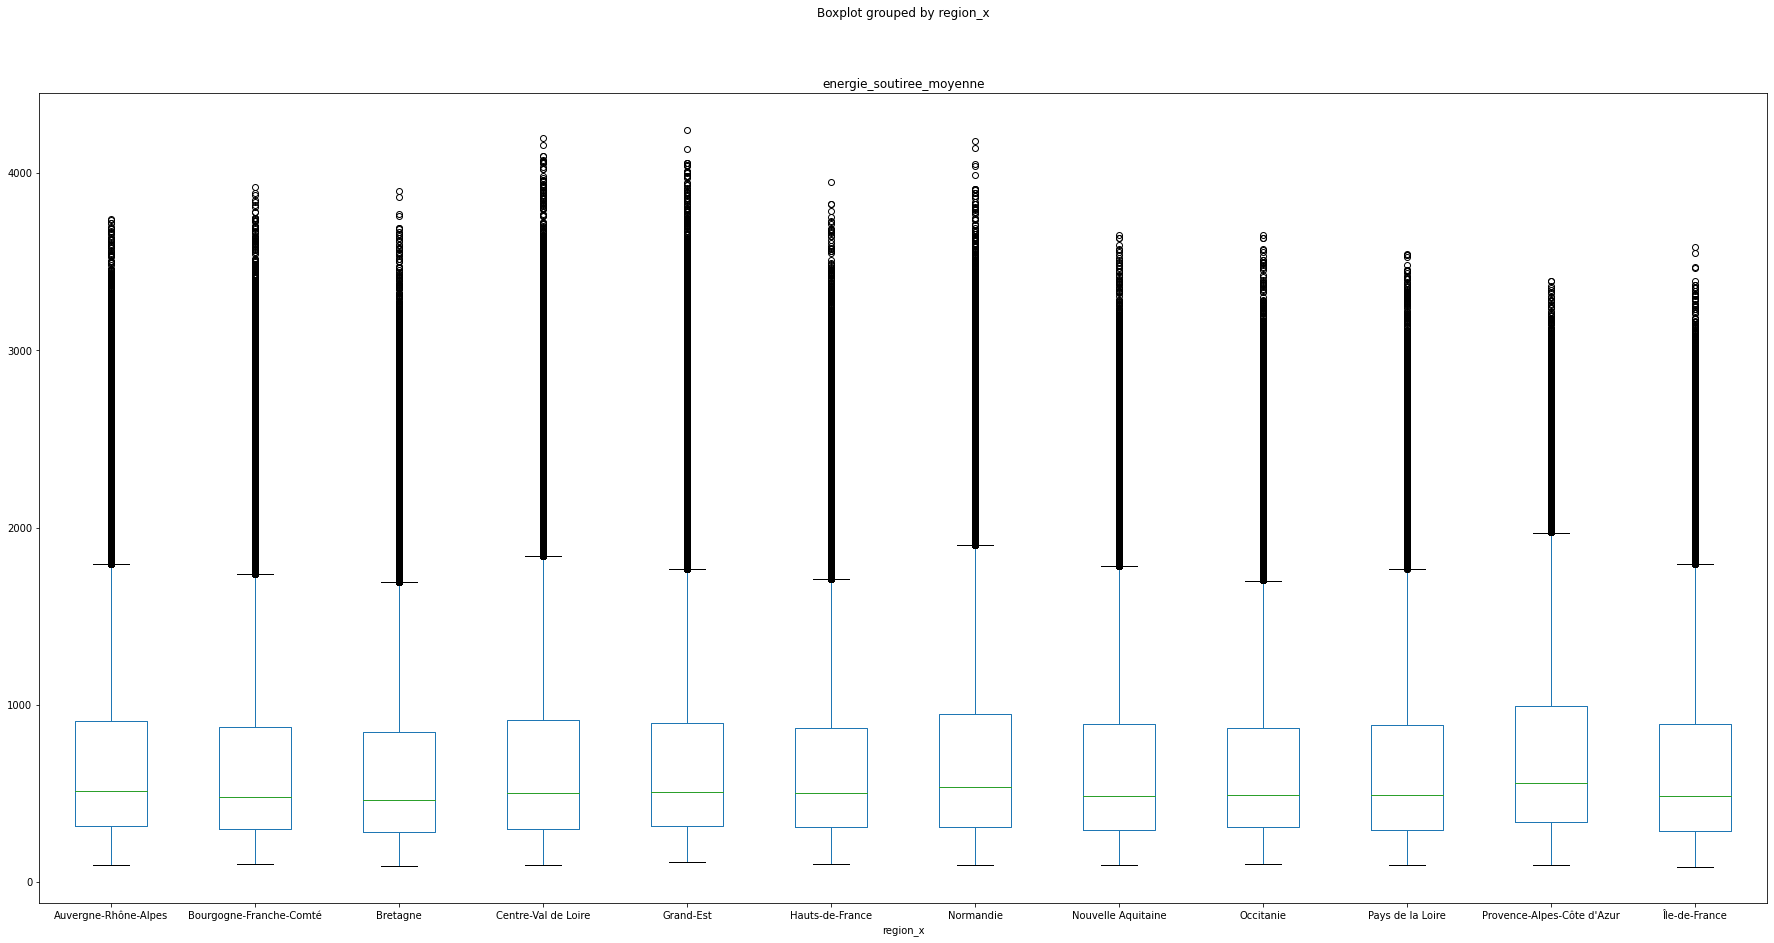

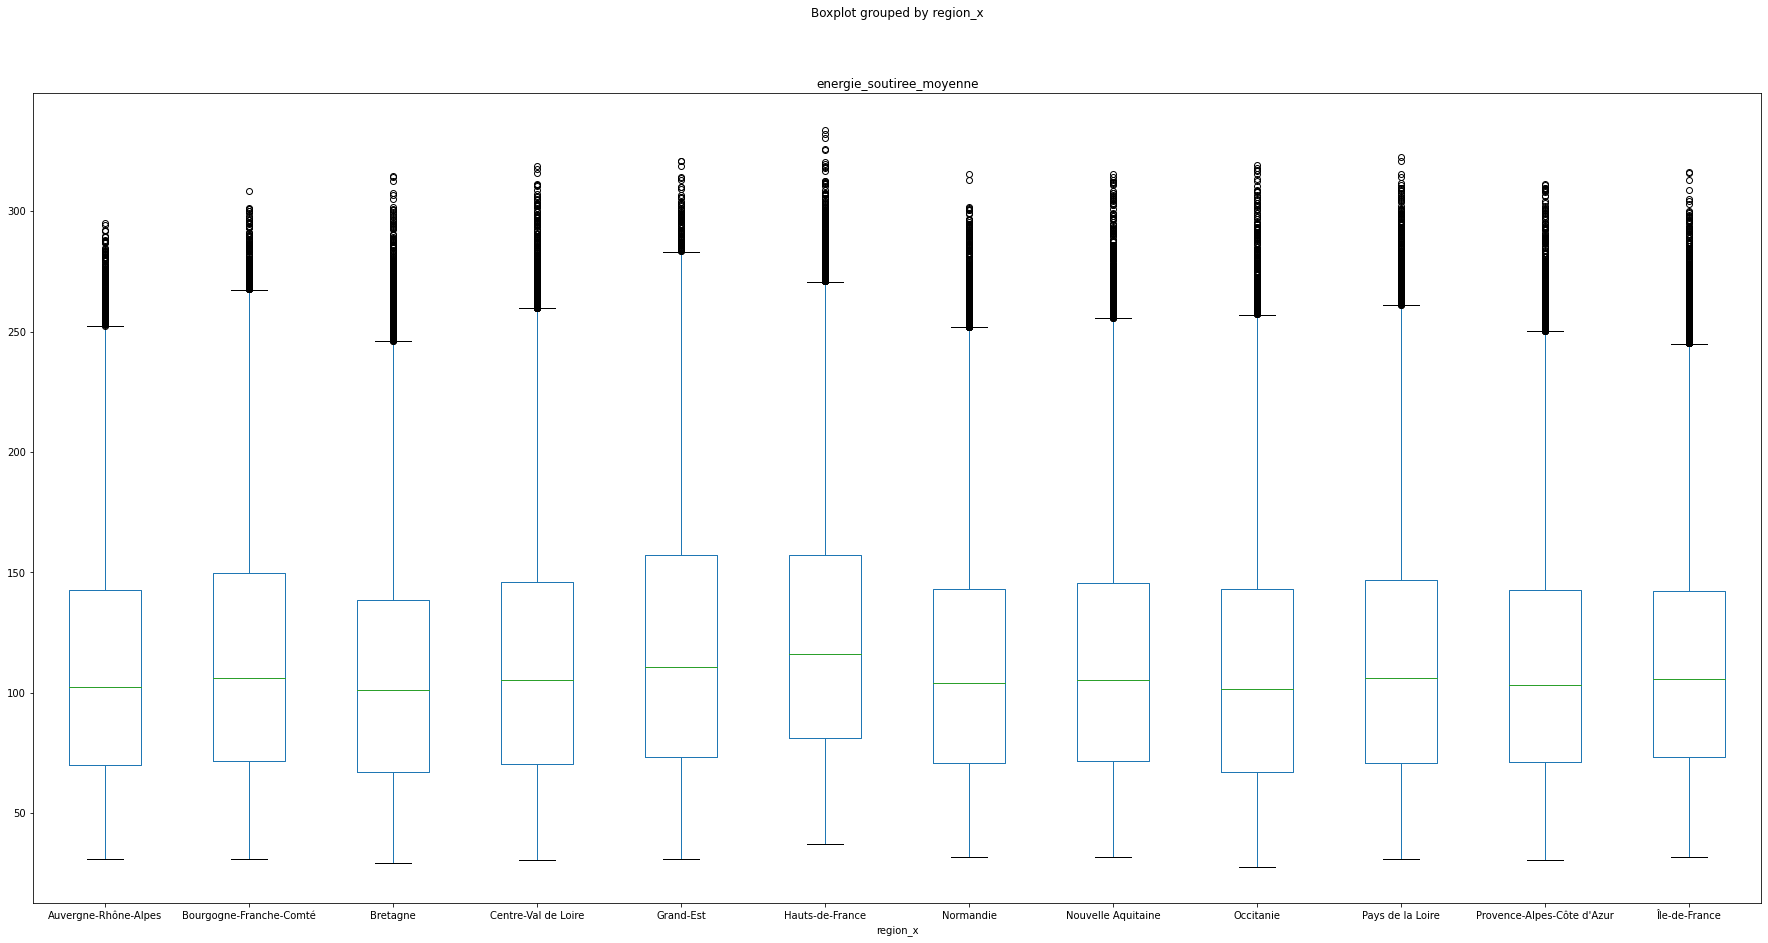

In [169]:
plt.figure(figsize=(30, 10))
haute_conso.boxplot(by="region_x",column=["energie_soutiree_moyenne"],grid=False,figsize=(30, 15))
basse_conso.boxplot(by="region_x",column=["energie_soutiree_moyenne"],grid=False,figsize=(30, 15))

### Deux barplot : conso totale et population

<function matplotlib.pyplot.show(close=None, block=None)>

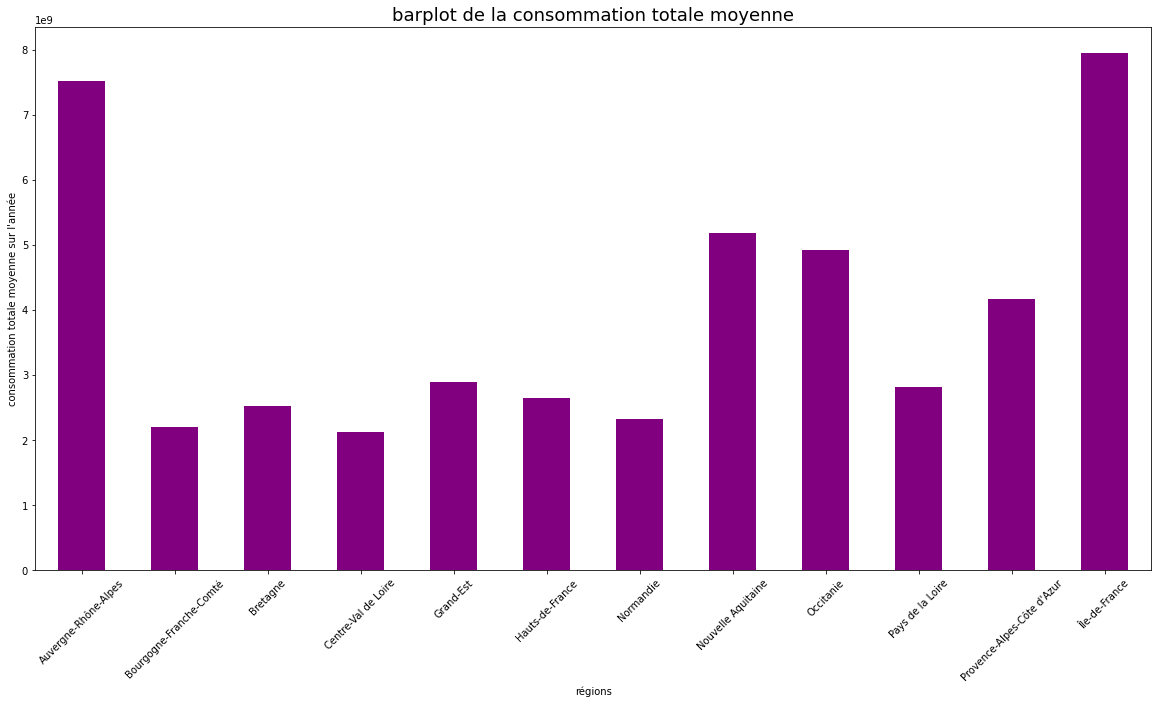

In [202]:
# Premièrement : conso totale pour chaque jour par région
# deuxièment : moyenne des conso totale sur l'année
# barplot des conso totale sur l'année


total_energie_temp=haute_conso.groupby(["region_x","date"])["total_energie_soutiree_wh"].sum().reset_index()
total_energie=total_energie_temp.groupby("region_x")["total_energie_soutiree_wh"].mean()

plt.figure(figsize=(20, 10))
total_energie.plot.bar(color="purple")
plt.xlabel('régions')
plt.xticks(rotation = 45)
plt.ylabel("consommation totale moyenne sur l'année")
plt.title("barplot de la consommation totale moyenne",size=18)
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

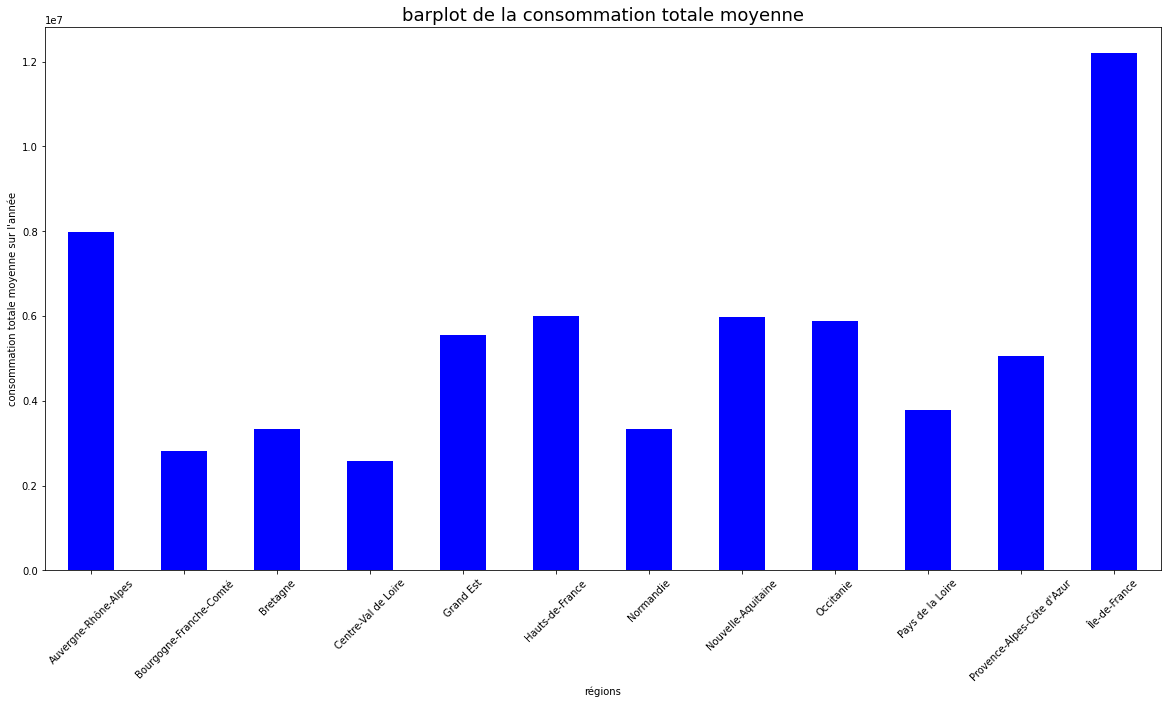

In [209]:
population=socio.drop(socio[(socio["Libellé"]=="Corse")].index)
population=population.groupby("Libellé")["Population au dernier recensement 2018"].mean()
plt.figure(figsize=(20, 10))
population.plot.bar(color="blue")
plt.xlabel('régions')
plt.xticks(rotation = 45)
plt.ylabel("consommation totale moyenne sur l'année")
plt.title("barplot de la consommation totale moyenne",size=18)
plt.show

# Par saison 

In [178]:
enedis_final["mois"]=enedis_final["date"].apply(lambda x : x[5:7])

In [183]:
ete=enedis_final[(enedis_final["mois"]=="06")|(enedis_final["mois"]=="07")|(enedis_final["mois"]=="08")]

In [184]:
automne=enedis_final[(enedis_final["mois"]=="09")|(enedis_final["mois"]=="10")|(enedis_final["mois"]=="11")]

In [185]:
hiver=enedis_final[(enedis_final["mois"]=="12")|(enedis_final["mois"]=="01")|(enedis_final["mois"]=="02")]

In [186]:
printemps=enedis_final[(enedis_final["mois"]=="03")|(enedis_final["mois"]=="04")|(enedis_final["mois"]=="05")]

C:\Users\elelo\AppData\Local\Temp/ipykernel_7420/1882068193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haute_conso_30_09_2020["heure"]=haute_conso_30_09_2020["horodate"].apply(lambda x : x[11:16])


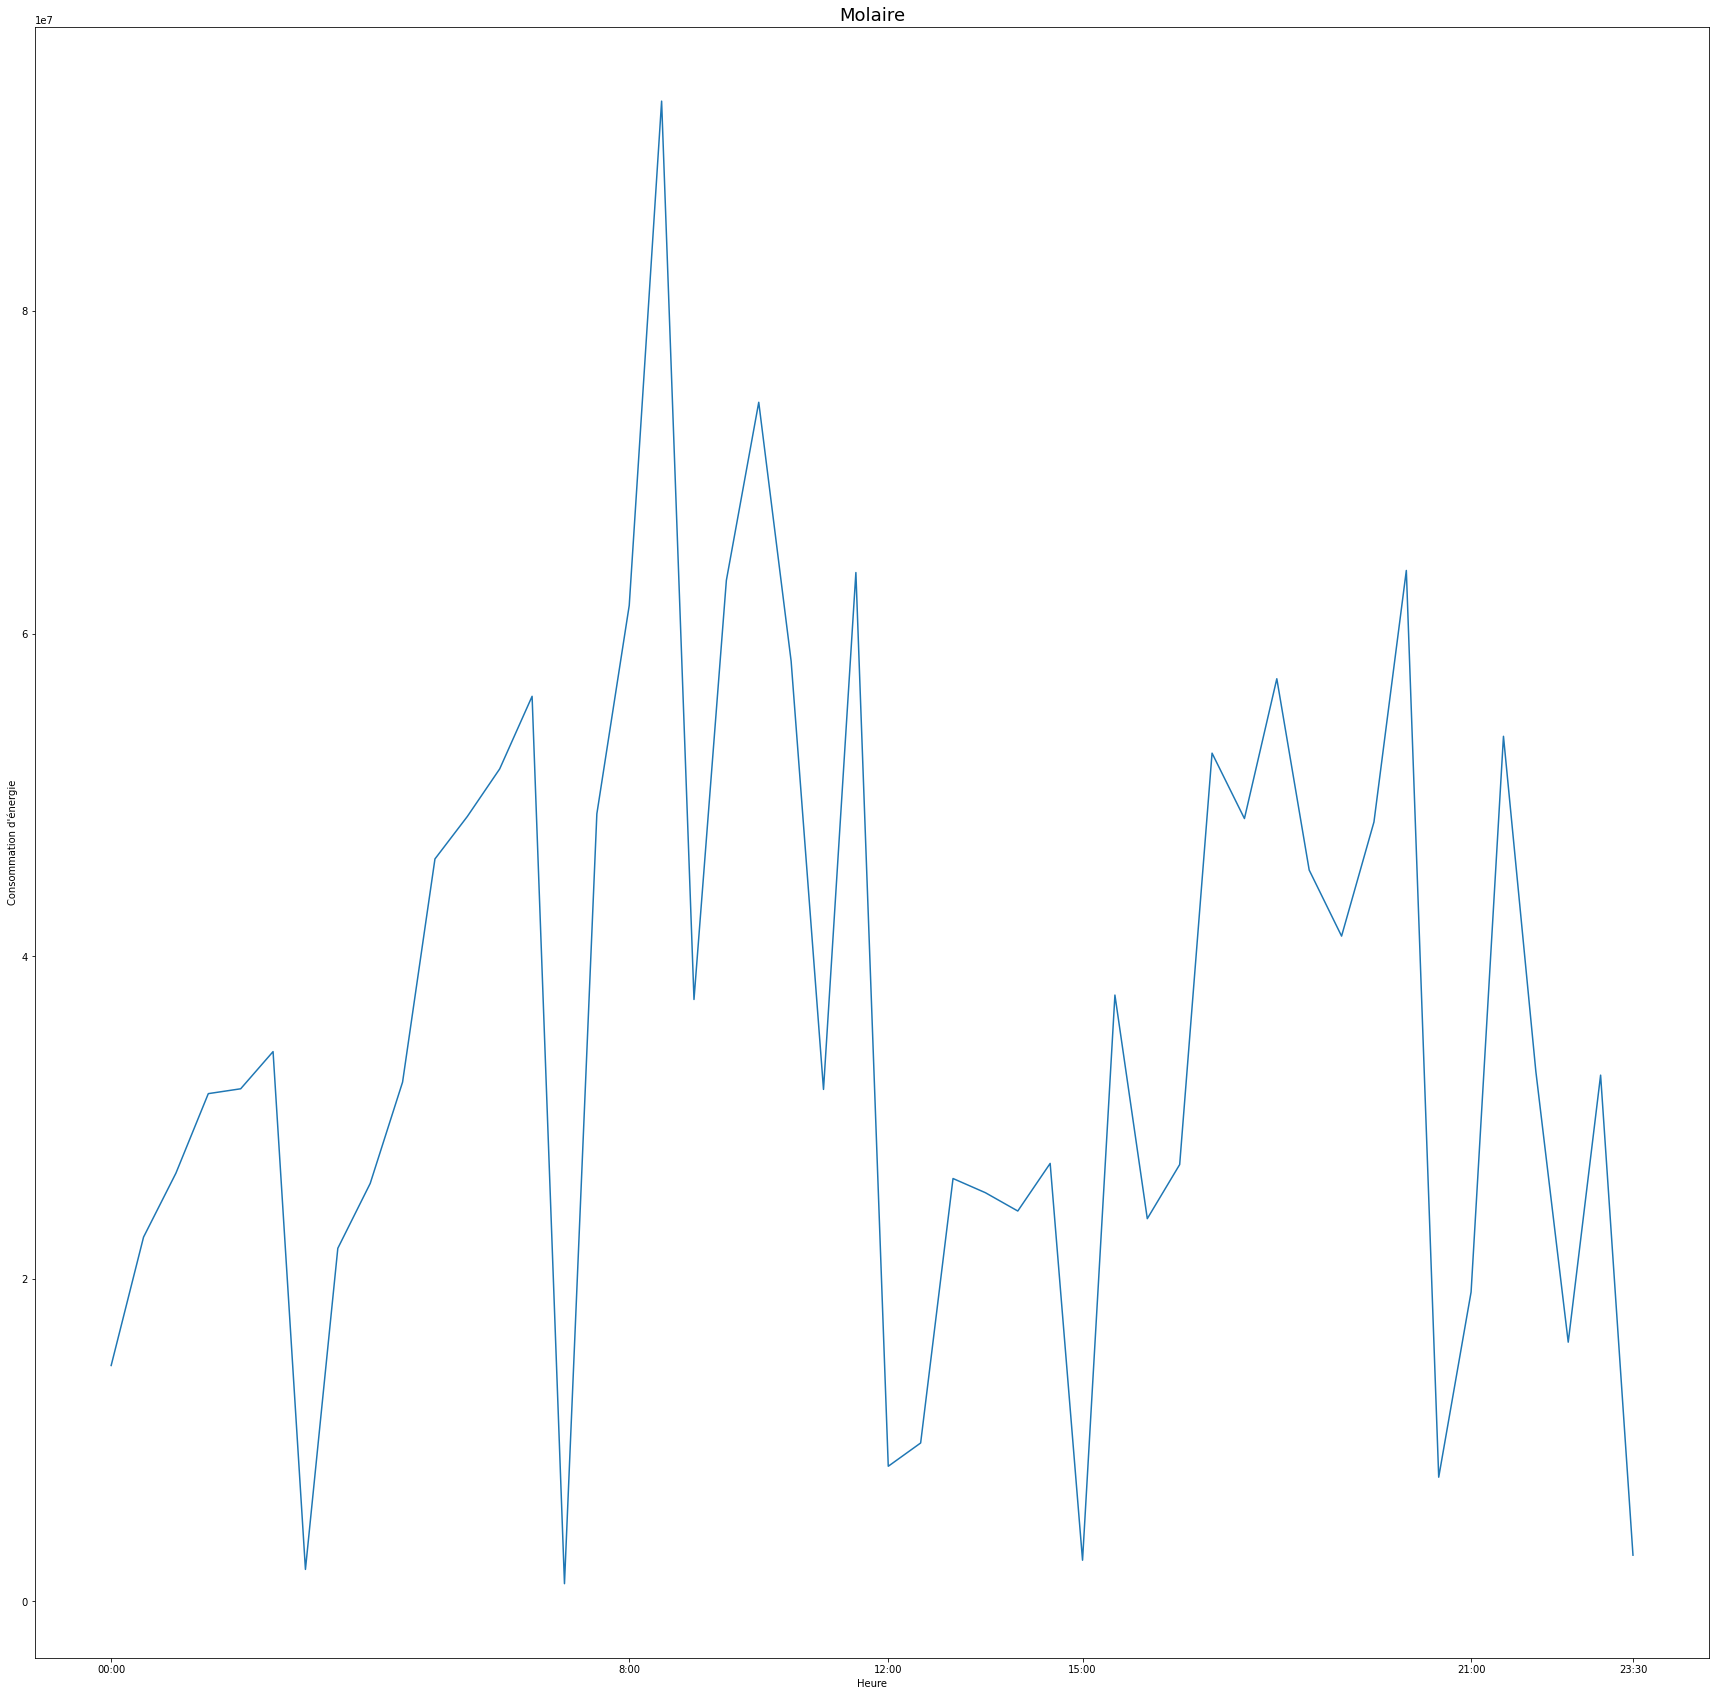

In [243]:
haute_conso_normandie=haute_conso[haute_conso["region_x"]=="Île-de-France"]
haute_conso_30_09_2020 = haute_conso_normandie[haute_conso_normandie["date"]=="2020-09-30"]
haute_conso_30_09_2020["heure"]=haute_conso_30_09_2020["horodate"].apply(lambda x : x[11:16])
total_haute_conso_30_09_2020=haute_conso_30_09_2020.groupby("heure")["total_energie_soutiree_wh"].mean().reset_index()

plt.figure(figsize=( 30, 30))
plt.plot(total_haute_conso_30_09_2020["heure"],total_haute_conso_30_09_2020["total_energie_soutiree_wh"] )
t2=["00:00","08:00","12:00","15:00","21:00","23:30"]
plt.xticks(t2,["00:00","8:00","12:00","15:00","21:00","23:30"])
plt.xlabel('Heure')
plt.ylabel("Consommation d'énergie")
plt.title('Molaire',size=18)
plt.show()
